In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd drive/MyDrive/Text classification

/content/drive/MyDrive/Text classification


In [109]:
data = pd.read_csv('/content/drive/MyDrive/Text classification/dataset/train.csv')

In [110]:
testdata = pd.read_csv('/content/drive/MyDrive/Text classification/dataset/test.csv')

In [111]:
tdata.head()

,description
0,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,Balmuda: the Toaster is a Japanese invention t...
2,These are the molecular machines inside your b...
3,LeBron James is 'obviously' the NBA MVP this s...
4,Lol - Subscribe to my new channel that will co...


In [112]:
data = data[['category_id', 'description']]
tdata= testdata.copy()
tdata = tdata[['description']]

In [113]:
data = data.dropna()
data

,category_id,description
0,10.0,Music video by Luke Bryan performing Out Of No...
1,24.0,thanks for watching!!! happy holidays everyone...
2,1.0,Marcus and Adam build their own custom lightsa...
3,26.0,Make sure you subscribe to my channel and hit ...
4,24.0,It's a riff-off pitches! Get Tix: http://unvrs...
...,...,...
3466,24.0,Subscribe now for more! http://bit.ly/1KyA9sV\...
3467,28.0,Get a free audio book by clicking http://www.a...
3468,10.0,The Official video for Moby's Like A Motherles...
3469,26.0,"Hey Larlees, todays video is a fun collab with..."


In [114]:
tdata = tdata.dropna()
tdata

,description
0,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,Balmuda: the Toaster is a Japanese invention t...
2,These are the molecular machines inside your b...
3,LeBron James is 'obviously' the NBA MVP this s...
4,Lol - Subscribe to my new channel that will co...
...,...
1483,"While loads better than Cars 2, Cars 3 is stil..."
1484,Pond Jump Fail | Subscribe: http://bit.ly/SubT...
1485,In this episode of Derek Does Stuff with a Fri...
1486,"On Raw's 25th Anniversary, The Deadman emerges..."


In [115]:
import pandas as pd
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
import base64
import string
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [116]:
data.head()

,category_id,description
0,10.0,Music video by Luke Bryan performing Out Of No...
1,24.0,thanks for watching!!! happy holidays everyone...
2,1.0,Marcus and Adam build their own custom lightsa...
3,26.0,Make sure you subscribe to my channel and hit ...
4,24.0,It's a riff-off pitches! Get Tix: http://unvrs...


In [117]:
data['category_id'].nunique()

16

In [118]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.33, random_state=42)

In [119]:
print('Research title sample:', train['description'].iloc[0])
print('Conference of this paper:', train['category_id'].iloc[0])
print('Training Data Shape:', train.shape)
print('Testing Data Shape:', test.shape)

Research title sample: Miley Cyrus joins Ashland Craft, Brooke Simpson and Janice Freeman to sing Man! I Feel Like a Woman by Shania Twain during the live Top 11 eliminations.\n» Get The Voice Official App: http://bit.ly/TheVoiceOfficialApp\n» Subscribe for More: http://bit.ly/TheVoiceSub\n» Watch The Voice Mondays & Tuesdays 8/7c on NBC!\n» Watch Full Episodes: http://bit.ly/TheVoiceFullEpisodes\n\nTHE VOICE ON SOCIAL:\nLike The Voice: http://Facebook.com/NBCTheVoice\nFollow The Voice: https://Twitter.com/NBCTheVoice\nThe Voice Tumblr: http://nbcTheVoice.Tumblr.com/\nFollow The Voice on Instagram: https://instagram.com/nbcthevoice/\n\nNBC’s The Voice follows the strongest vocalists from across the country and invites them to compete in this season's blockbuster vocal competition.\n\nFind The Voice trailers, full episode highlights, previews, promos, clips, and digital exclusives here.\n\nNBC ON SOCIAL:\nNBC YouTube: http://www.youtube.com/nbc\nLike NBC: http://Facebook.com/NBC\nFollow

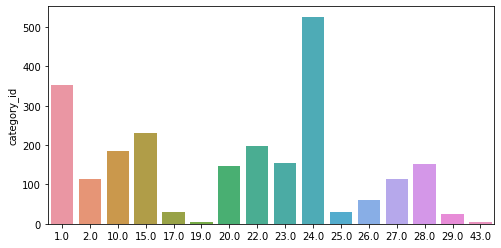

In [120]:

fig = plt.figure(figsize=(8,4))
sns.barplot(x = train['category_id'].unique(), y=train['category_id'].value_counts())
plt.show()

In [121]:
import spacy

nlp = spacy.load('en_core_web_sm')
punctuations = string.punctuation

# Define function to cleanup text by removing personal pronouns, stopwords, and puncuation
def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)

In [122]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
import string
import re
import spacy
spacy.load('en')
from spacy.lang.en import English
parser = English()

In [123]:
STOPLIST = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS))
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-", "...", "”", "”"]

In [124]:
class CleanTextTransformer(TransformerMixin):
    def transform(self, X, **transform_params):
        return [cleanText(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}
    
def cleanText(text):
    text = text.strip().replace("\n", " ").replace("\r", " ")
    text = text.lower()
    return text

def tokenizeText(sample):
    tokens = parser(sample)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    tokens = [tok for tok in tokens if tok not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    return tokens

In [125]:
vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,1))
clf = LinearSVC()
pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('clf', clf)])

# data
train1 = train['description'].tolist()
labelsTrain1 = train['category_id'].tolist()

test1 = test['description'].tolist()
labelsTest1 = test['category_id'].tolist()


# train
pipe.fit(train1, labelsTrain1)

# test
preds = pipe.predict(test1)
print(preds)
print("accuracy:", accuracy_score(labelsTest1, preds))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[25. 24. 24. ... 10. 24. 23.]
accuracy: 0.7853403141361257


In [126]:
from sklearn.metrics import f1_score
f1 = f1_score(labelsTest1, preds,average='weighted')
f1

0.7862106833903395

In [127]:
test2 = tdata['description'].tolist()
preds2 = pipe.predict(test2)
print(preds2)


[22. 19. 27. ... 24. 17. 24.]


In [128]:
testdata['catageory_id']=pd.Series(preds2, index=testdata.index)

In [131]:
testdata.drop(['description'], axis=1)

,video_id,catageory_id
0,2kyS6SvSYSE,22.0
1,_6lGaYh71g4,19.0
2,X_tYrnv_o6A,27.0
3,BEcs3TL8DII,17.0
4,26qOMpjicGs,24.0
...,...,...
1483,2Nlo2ekTRvI,1.0
1484,tUbky9YzPZY,24.0
1485,I6N-XuYllgA,24.0
1486,phCIKfJY7SU,17.0


In [133]:
testdata.to_csv('submission.csv',index=False)

In [134]:
ls

76c6610ac8e711eb.zip  dbert_label.pkl  dbert_model.h5  tokenization.py
dataset/              dbert_mask.pkl   __pycache__/
dbert_inp.pkl         dbert_model/     submission.csv


In [135]:
from xgboost import XGBClassifier

In [137]:

clf2 = XGBClassifier()

In [141]:
pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('clf2', clf2)])

# data
train3 = train['description'].tolist()
labelsTrain3 = train['category_id'].tolist()

test3 = test['description'].tolist()
labelsTest3 = test['category_id'].tolist()


# train
pipe.fit(train3, labelsTrain3)

# test
preds3 = pipe.predict(test3)
print(preds3)
print("accuracy:", accuracy_score(labelsTest3, preds3))


[27. 24. 24. ... 10. 24. 23.]
accuracy: 0.6719022687609075


[27. 24. 24. ... 10. 24. 23.]
accuracy: 0.6719022687609075
